In [4]:
# import pandas as pd
import matplotlib.pyplot as plt
import os, glob
import pandas as pd

In [10]:
dirs = ["auc/after_r", "auc/after_u"], 
#         "before_r", "before_u",
#         "old_before_r", "old_before_u"]

In [11]:
results_dict = {}
for d in dirs:
     results_dict[d] = pd.concat([
         pd.read_csv(x) for x in glob.glob(os.path.join("../results", d, "active_train_log_*.csv"))
     ]).drop_duplicates()

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'list'

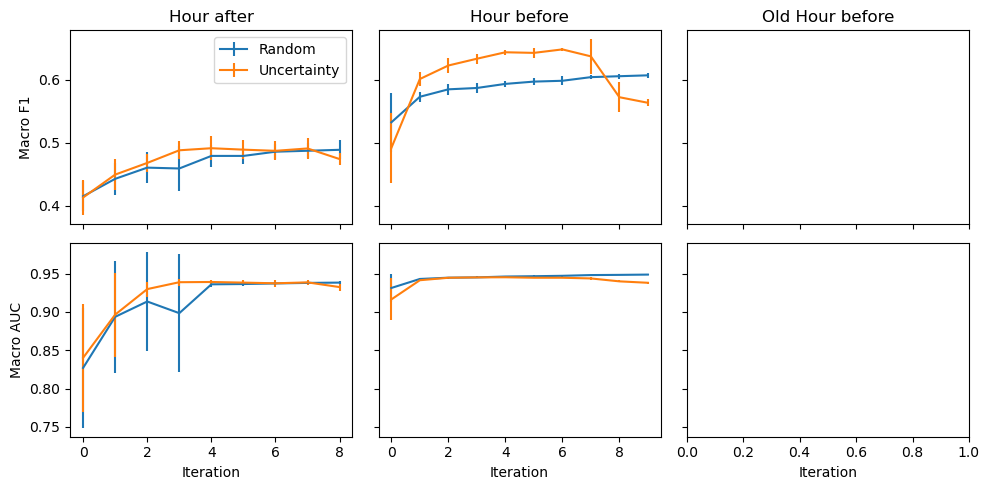

In [7]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 5), sharex = "col", sharey = "row")

df = results_dict["after_r"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][0].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][0].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
df = results_dict["after_u"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][0].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][0].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])


df = results_dict["before_r"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][1].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][1].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
df = results_dict["before_u"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][1].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][1].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])

'''
df = pd.read_csv(os.path.join("../results", dirs[4], "active_train_log.csv"))
axs[0][2].plot(df["iteration"], df["test_ave_f1"])
axs[1][2].plot(df["iteration"], df["test_auc"])
df = pd.read_csv(os.path.join("../results", dirs[5], "active_train_log.csv"))
axs[0][2].plot(df["iteration"], df["test_ave_f1"])
axs[1][2].plot(df["iteration"], df["test_auc"])

'''
axs[0][0].set_ylabel("Macro F1")
axs[1][0].set_ylabel("Macro AUC")
_ = [axx.set_xlabel("Iteration") for axx in axs[1]]

axs[0][0].set_title("Hour after")
axs[0][1].set_title("Hour before")
axs[0][2].set_title("Old Hour before")

axs[0][0].legend(["Random", "Uncertainty"])
plt.tight_layout()